1. What is the fundamental idea behind support vector machines?

  -> identify the widest possible 'street' (hyperplane) between 2 classes 

  page 175: The two classes can clearly be separated easily with a straight line (they are linearly
  separable). ... You can think of an SVM classifier as fitting the widest possible street .... 
  This is called 'large margin classification'.

  https://www.spiceworks.com/tech/big-data/articles/what-is-support-vector-machine/
  Technically, the primary objective of the SVM algorithm is to identify a hyperplane that distinguishably 
  segregates the data points of different classes. The hyperplane is localized in such a manner that the 
  largest margin separates the classes under consideration.

  page 177: ... The objective is to find a good balance between keeping the street as large as possible and
  limiting the 'margin violations (i.e. the instance that end up in the middle of the street or even on the
  wrong side). This is call 'soft margin classification'.

  book answer: The fundamental idea behind Support Vector Machines is to fit the widest possible "street" between 
  the classes. In other words, the goal is to have the largest possible margin between the decision boundary that 
  separates the two classes and the training instances. When performing soft margin classification, the SVM searches 
  for a compromise between perfectly separating the two classes and having the widest possible street (i.e., a few 
  instances may end up on the street). Another key idea is to use kernels when training on nonlinear datasets. SVMs 
  can also be tweaked to perform linear and nonlinear regression, as well as novelty detection.

2. What is a support vector?
   -> the instances located on street (hyperplane separating classes) including instances located on the 
   edge of the street

  page 176: Notice that adding more training instances "off the street" will not affect the decision boundary
  at all: it fully determined (or "supported") by the instance located on the edge of the street. These instances
  are called the "support vectors" (they are circled in figure 5-1).

  book answer: After training an SVM, a support vector is any instance located on the "street" (see the previous 
  answer), including its border. The decision boundary is entirely determined by the support vectors. Any instance 
  that is not a support vector (i.e., is off the street) has no influence whatsoever; you could remove them, add 
  more instances, or move them around, and as long as they stay off the street they won't affect the decision 
  boundary. Computing the predictions with a kernelized SVM only involves the support vectors, not the whole training set.

3. Why is it important to scale the inputs when using SVMs?

  -> when features are not scaled, the larger valued features may be over weighted when determing the
  decision boundary. this can result in a smaller street between the classes.

  page 176: SVMs are sensitive to the feature scales, as you can see in Figure 5-2. IN the left plot, the
  vertical scale is much larger than the horizontal scale, so the widest possible street is close to 
  horizontal, After feature scaling (e.g. using Scikit-Learn's Standscalar) the decision boundary in the right plot 
  looks better.

  book anwser: SVMs try to fit the largest possible "street" between the classes (see the first answer), so if 
  the training set is not scaled, the SVM will tend to neglect small features (see Figure 5-2)


4. Can an SVM classifier output a confidence score when it classifies an instance?

  -> LinearSVC decision_function returns 'confidence scores' based on the signed distance between the instance
  and decision boundary.

  -> SVC predict_proba() returns probabities scores and predit_log_proba() returns log probability scores
  provided 'probability=True' when training at a cost of slower training

  page 178: The first plant is classified as an 'Iris virginica' while the second is not. Let's look at the
  scores that the SVM used to make these predictions. These measure the signed distance between each instance
  and the decision boundary:
    >>> svm_clf = make_pipeline(StandardScaler(), LinearSVC(C=1, dual=True, random_state=42))
    >>> svm_clf.fit(X, y)
    >>> X_new = [[5.5, 1.7], [5.0, 1.5]]
    >>> svm_clf.predict(X_new)
        array([ True, False])
    >>> svm_clf.decision_function(X_new)
        array([ 0.66163411, -0.22036063])

   page 178: Unlike LogisiticRegression, LinearSVC doesnt have a predict_proba() method to estimate the class
   probabilities. That said, if you use the SVC class (discussed shortly) instead of LinearSVC, and if you 
   set its probability hyperparameter to 'True', then the model will fit an extra model at the end of training
   to map the SVM decision function scores to probabilities. Under the hood this requires using 5-fold-cross-
   validation to generate out-of-sample predictions for every instance in the training set, then training
   a LogisticRegression model, so it will slow does training considerably. After that, the 'predict_proba()'
   and 'predict_log_proba()' methods will be avaiable.

    https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC.decision_function
    sklearn.svm.LinearSVC
      ...
      decision_function(X)[source]

      Predict confidence scores for samples.

      The confidence score for a sample is proportional to the signed distance of that sample to the hyperplane.

    https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
    sklearn.svm.SVC
      ... 
      predict_log_proba(X)
         Compute log probabilities of possible outcomes for samples in X.
      predict_proba(X)
         Compute probabilities of possible outcomes for samples in X.

         The model needs to have probability information computed at training time: fit with attribute 
         'probability' set to 'True'.

  book answer:  You can use the `decision_function()` method to get confidence scores. These scores represent 
  the distance between the instance and the decision boundary. However, they cannot be directly converted into 
  an estimation of the class probability. If you set `probability=True` when creating an `SVC`, then at the end 
  of training it will use 5-fold cross-validation to generate out-of-sample scores for the training samples, 
  and it will train a `LogisticRegression` model to map these scores to estimated probabilities. The 
  `predict_proba()` and `predict_log_proba()` methods will then be available.

5. How can you choose between 'LinearSVC', 'SVC', and 'SGDClassifer'?

   -> all 3 can be used for large margin linear classification
   -> Use LinearSVC for large linear training sets which can fit in memory
   -> Use SVC for small or medium-sized nonlinear training sets
      - SVC does not scale well with large number of instances (e.g. 100Ks)
   -> Use SGDClassifier for large linear training sets which cannot fit in memory

  page 183: 
    LinearSVC class: 
     - based on liblinear liblinear (optimized algorithm for linear SVM).
     - training complexity is roughly O(m x n)
     - scales almost linearly with training instances and number of features
     - algorithm controlled by the tolerance hyperparameter 'epilson' (called 'tol' in Scikit-Learn

    SVC class: 
     - based on liblinear libsvm 
     - supports the 'kernel trick'
     - training complexity is between O(m**2 x n) and O(m**3 x n)
     - gets dreadfully slow when the number of training instances get large (100ks of instances)
     - best for small or medium-sized nonlinear training sets
     - scales well with the number of features, specially with sparse features (i.e. when each instance 
       has few non-zero features)

    SGDClassifier class: 
     - performs large margin classification by default
     - its hyperparameters - especially the regulization hyperparameters ('alpha' and 'penalty') and the
       'learning rate' can be adjusted to produce similar results as the linear SVMs
     - training complexity is O(m x n) 
     - for training, it uses stochastic gradient descent which allows incremental learning and uses little memory, 
       so you can use it to train a model on a large dataset that does not fit in memory ('out-of-core learning)

  book answer:  All three classes can be used for large-margin linear classification. The `SVC` class also 
  supports the kernel trick, which makes it capable of handling nonlinear tasks. However, this comes at a cost: 
  the `SVC` class does not scale well to datasets with many instances. It does scale well to a large number 
  of features, though. The `LinearSVC` class implements an optimized algorithm for linear SVMs, while 
  `SGDClassifier` uses Stochastic Gradient Descent. Depending on the dataset `LinearSVC` may be a bit faster 
  than `SGDClassifier`, but not always, and `SGDClassifier` is more flexible, plus it supports incremental learning.

6. Say you've trained an SVM classifier with and RBF kernel, but it seems to underfit the training set.
   Should you increase or decrease 'gamma'? What about 'C'?

   -> For overfitting, you should increase 'gamma' and similarly, you should increase 'C'.

  page 182: So 'gamma' acts like a regularization hyperparameter: if your model is overfitting, you 
  should reduce 'gamma'; if it is underfitting, you should increase 'gamma' (similar to the 'C' hyperparameter).

  book answer: If an SVM classifier trained with an RBF kernel underfits the training set, there might be 
  too much regularization. To decrease it, you need to increase `gamma` or `C` (or both).

7. What does it mean for a model to be 'epsilon' insensitive?

  -> SVR Regression model is 'epsilon' insensitive when adding more training instances within the
  margin does not affect the model's prediction.

  page 184: To use SVMs for regression instead of classification, the trick is to tweek the objective:
  instead of trying to fit the largest possible street between two classes while limiting the margin 
  violations, SVM regression tries to fit as many instances as possible 'on the street' while limiting
  margin violations (i.e. instances 'off the street'). The width of the 'street' is controlled by a
  hyperparameter, 'epsilon' ...

  page 184: Reducing 'epsilon' increases the number of support vectors, whuich regularizes the model.
  Moreover, if you add more training instances within the margin, it will not affect the model's predictions;
  thus, the model is said to be 'epsilon'-insensitive.

  book answer:  A Regression SVM model tries to fit as many instances within a small margin around its 
  predictions. If you add instances within this margin, the model will not be affected at all: it is said 
  to be 'epsilon'-insensitive.

8 What is the point of using the 'kernel' trick?

  -> allows SVMs to handle non-linear datasets

  page 180: Fortunately, when using SVMs you can apply an almost miraculous mathematical technique caled 
  the 'kernel trick' (...). The 'kernel trick' makes it possible to get the same results as if you had
  added many polynomial features, even with a high degree, without actually having to add them. This
  means there's no combinatorial explosion of the number of features. This trick is implemented by the SVC
  class. 

    >>> from sklearn.svm import SVC
    >>> poly_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel="poly", degree=3, coef0=1, C=5))
    >>> poly_kernel_svm_clf.fit(X, y)

  page 183: ... As a rule of thumb, you should always try the linear kernel first. The 'LinearSVC' class
  is much faster thans SVC(kernel="linear"), especially if the training set is very large. If it is not
  too large, you should also try kernelized SVMs, starting with the Gaussian RBF Kernel; if often works
  really well.

   book answer: The kernel trick is mathematical technique that makes it possible to train a nonlinear SVM model. 
   The resulting model is equivalent to mapping the inputs to another space using a nonlinear transformation, 
   then training a linear SVM on the resulting high-dimensional inputs. The kernel trick gives the same result 
   without having to transform the inputs at all.
   

 What is the point of using the 'kernel' trick?

  -> allows SVMs to handle non-linear datasets

  page 180: Fortunately, when using SVMs you can apply an almost miraculous mathematical technique caled 
  the 'kernel trick' (...). The 'kernel trick' makes it possible to get the same results as if you had
  added many polynomial features, even with a high degree, without actually having to add them. This
  means there's no combinatorial explosion of the number of features. This trick is implemented by the SVC
  class. 

    >>> from sklearn.svm import SVC
    >>> poly_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel="poly", degree=3, coef0=1, C=5))
    >>> poly_kernel_svm_clf.fit(X, y)

  page 183: ... As a rule of thumb, you should always try the linear kernel first. The 'LinearSVC' class
  is much faster thans SVC(kernel="linear"), especially if the training set is very large. If it is not
  too large, you should also try kernelized SVMs, starting with the Gaussian RBF Kernel; if often works
  really well.

   book answer: The kernel trick is mathematical technique that makes it possible to train a nonlinear SVM model. 
   The resulting model is equivalent to mapping the inputs to another space using a nonlinear transformation, 
   then training a linear SVM on the resulting high-dimensional inputs. The kernel trick gives the same result 
   without having to transform the inputs at all.


9. Train a 'LinearSVC' on a linearly separable dataset. Then train an SVC and a 'SGDClassifier' 
   on the same dataset See if you can get them to produce roughly the same model.


Let's use the Iris dataset: the Iris Setosa and Iris Versicolor classes are linearly separable.

In [2]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [4]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [27]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
X[:3]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2]])

In [28]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [29]:
y = iris.target
y.shape

(150,)

In [30]:
setosa_or_versicolor = ( y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]
print (f'X.shape: {X.shape}   y.shape: {y.shape}')

X.shape: (100, 2)   y.shape: (100,)


In [32]:
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [33]:
# using pipeline
# lin_clf = make_pipeline(StandardScaler(), LinearSVC(loss="hinge", C=1, dual=True, random_state=42))
# lin_clf.fit(X, y)

In [34]:
# without pipeline so that scaled X can be shared
C = 5
alpha = 0.05

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf = LinearSVC(loss="hinge", C=C, dual=True, random_state=42).fit(X_scaled, y)
svc_clf = SVC(kernel="linear", C=C).fit(X_scaled, y)
sgd_clf = SGDClassifier(alpha=alpha, random_state=42).fit(X_scaled, y)

Let's plot the decision boundaries of these three models:

In [39]:
print(f'lin_clf.coef_: {lin_clf.coef_}     lin_clf.intercept_:{lin_clf.intercept_}')
print(f'svc_clf.coef_: {svc_clf.coef_}     svc_clf.intercept_:{svc_clf.intercept_}')
print(f'sgd_clf.coef_: {sgd_clf.coef_}     sgd_clf.intercept_:{sgd_clf.intercept_}')

lin_clf.coef_: [[1.05364854 1.09903804]]     lin_clf.intercept_:[0.28475098]
svc_clf.coef_: [[1.1203284  1.02625193]]     svc_clf.intercept_:[0.31896852]
sgd_clf.coef_: [[0.8929578  0.81042361]]     sgd_clf.intercept_:[0.29381534]


In [47]:
def compute_decision_boundary(model):
    # coef_: Weights assigned to the features (coefficients in the primal problem)
    w = -model.coef_[0, 0] / model.coef_[0, 1]
    # intercept: Constants in decision function.
    b = -model.intercept_[0] / model.coef_[0, 1]
    # StandardScaler inverse_transform: Scale back the data to the original [unscaled] representation.
    # return 2 points on decision line where X=-10,10 and y = w*x +b
    return scaler.inverse_transform([[-10, -10 * w + b], [10, 10 * w + b]])

lin_line = compute_decision_boundary(lin_clf)
print(f'lin_line: {lin_line}')
svc_line = compute_decision_boundary(svc_clf)
print(f'svc_line: {svc_line}')
sgd_line = compute_decision_boundary(sgd_clf)
print(f'sgd_line: {sgd_line}')

lin_line: [[-11.56182566   6.03127548]
 [ 17.28382566  -4.7506598 ]]
svc_line: [[-11.56182566   6.74990632]
 [ 17.28382566  -5.52745487]]
sgd_line: [[-11.56182566   6.77800668]
 [ 17.28382566  -5.61373986]]


In [48]:
print(f'{lin_line[:, 0]}')
lin_line[:, 1]

[-11.56182566  17.28382566]


array([ 6.03127548, -4.7506598 ])

In [49]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

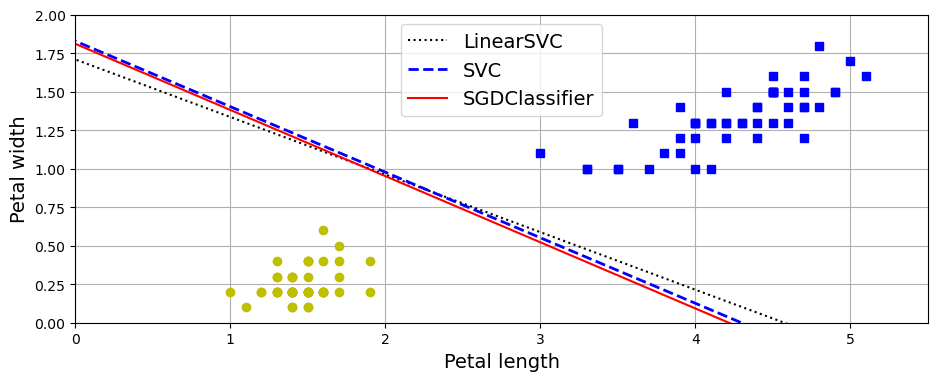

In [50]:
# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(lin_line[:, 0], lin_line[:, 1], "k:", label="LinearSVC")
plt.plot(svc_line[:, 0], svc_line[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(sgd_line[:, 0], sgd_line[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper center")
plt.axis([0, 5.5, 0, 2])
plt.grid()

plt.show()

Close enough!

10. Train an SVM classifer on the wine dataset, which you can load using 'sklearn.datasets.load_wine()'. 
   This dataset contains the chemical analyses of 178 wine samples produced by 3 different cultivators: 
   the goal is to train a classifaction model capable of predicting the cultivator based on the wine's
   chemical analysis. Since SVM classifiers are binary classifiers, you will need to use one-versus-all
   to classify all three classes. What accuracy can you reach?



In [52]:
from sklearn.datasets import load_wine

wine = load_wine(as_frame=True)
wine.data.shape

(178, 13)

In [53]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, random_state=42)

In [55]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
100,12.08,2.08,1.70,17.5,97.0,2.23,2.17,0.26,1.40,3.30,1.27,2.96,710.0
122,12.42,4.43,2.73,26.5,102.0,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365.0
154,12.58,1.29,2.10,20.0,103.0,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640.0
51,13.83,1.65,2.60,17.2,94.0,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265.0


In [56]:
y_train.head()

2      0
100    1
122    1
154    2
51     0
Name: target, dtype: int32

Let's start simple, with a linear SVM classifier. It will automatically use the One-vs-All (also called One-vs-the-Rest, OvR) strategy, so there's nothing special we need to do to handle multiple classes. Easy, right?


In [58]:
lin_clf = LinearSVC(dual=True, random_state=42)
lin_clf.fit(X_train, y_train)

C:\Users\pat\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

In [59]:
lin_clf = LinearSVC(max_iter=1_000_000, dual=True, random_state=42)
lin_clf.fit(X_train, y_train)

C:\Users\pat\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(max_iter=1000000, random_state=42)

Let's still evaluate this model with cross_val_score, it will serve as a baseline:

In [60]:
from sklearn.model_selection import cross_val_score

cross_val_score(lin_clf, X_train, y_train).mean()

C:\Users\pat\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\pat\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\pat\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\pat\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\pat\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.90997150997151

Well 91% accuracy on this dataset is not great. So did you guess what the problem is?

That's right, we forgot to scale the features! Always remember to scale the features when using SVMs:

In [62]:
lin_clf = make_pipeline(StandardScaler(),
                        LinearSVC(dual=True, random_state=42))
lin_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=42))])

Now it converges without any problem. Let's measure its performance:

In [63]:
from sklearn.model_selection import cross_val_score

cross_val_score(lin_clf, X_train, y_train).mean()

0.9774928774928775

Nice! We get 97.7% accuracy, that's much better.

Let's see if a kernelized SVM will do better. We will use a default SVC for now:

That's not better, but perhaps we need to do a bit of hyperparameter tuning:

In [66]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform

param_distrib = {
    "svc__gamma": loguniform(0.001, 0.1),
    "svc__C": uniform(1, 10)
}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distrib, n_iter=100, cv=5,
                                   random_state=42)
rnd_search_cv.fit(X_train, y_train)
rnd_search_cv.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=9.925589984899778, gamma=0.011986281799901188,
                     random_state=42))])

Note: best_estimator_ did not return any values - it appears it has been replaced with 'best_params_'

In [70]:
rnd_search_cv.best_params_

{'svc__C': 9.925589984899778, 'svc__gamma': 0.011986281799901188}

In [67]:
rnd_search_cv.best_score_

0.9925925925925926

Ah, this looks excellent! Let's select this model. Now we can test it on the test set:

In [68]:
rnd_search_cv.score(X_test, y_test)

0.9777777777777777

11. Train and fine-tune an SVM regressor on the California housing dataset. You can use the original
    dataset rahter than the tweaked version whe usind in Chapter 2, which you cna load using 
    'sklean.datasets.fetch_california_housing()'.  The targets represent hundreds thousands of dollars.
    Since there are over 20,000 instances, SVMs can be slow, so for hyperparater tuning you should use
    far fewer instances (e.g. 2000) to test many more hyperparameter combinations. What is your best
    model's RMSE?


Load dataset

In [71]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing.data
y = housing.target

Split it into a training set and a test set:

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

Let's train a simple LinearSVR first with scaling

In [76]:
from sklearn.svm import LinearSVR

lin_svr = make_pipeline(StandardScaler(), LinearSVR(dual=True, random_state=42))
lin_svr.fit(X_train, y_train)

C:\Users\pat\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(random_state=42))])

It did not converge, so let's increase max_iter:

In [77]:
lin_svr = make_pipeline(StandardScaler(),
                        LinearSVR(max_iter=5000, dual=True, random_state=42))
lin_svr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(max_iter=5000, random_state=42))])

Let's see how it performs on the training set:

In [78]:
from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
mse

0.9595484665813284

Let's look at the RMSE:

In [80]:
np.sqrt(mse)

0.979565447829459

In this dataset, the targets represent hundreds of thousands of dollars. The RMSE gives a rough idea of the kind of error you should expect (with a higher weight for large errors): so with this model we can expect errors close to $98,000! Not great. Let's see if we can do better with an RBF Kernel. We will use randomized search with cross validation to find the appropriate hyperparameter values for 'C' and 'gamma':

In [81]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform

svm_clf = make_pipeline(StandardScaler(), SVR())

param_distrib = {
    "svr__gamma": loguniform(0.001, 0.1),
    "svr__C": uniform(1, 10)
}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distrib,
                                   n_iter=100, cv=3, random_state=42)
rnd_search_cv.fit(X_train[:2000], y_train[:2000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('svr', SVR())]),
                   n_iter=100,
                   param_distributions={'svr__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000206DE011CD0>,
                                        'svr__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000206DE95DAD0>},
                   random_state=42)

In [83]:
# rnd_search_cv.best_estimator_
# use best_params_ instead of best_estimators_
rnd_search_cv.best_params_

{'svr__C': 4.63629602379294, 'svr__gamma': 0.08781408196485979}

In [84]:
-cross_val_score(rnd_search_cv.best_estimator_, X_train, y_train,
                 scoring="neg_root_mean_squared_error")

array([0.58835648, 0.57468589, 0.58085278, 0.57109886, 0.59853029])

Looks much better than the linear model. Let's select this model and evaluate it on the test set:

In [85]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

0.5854732265172243

So SVMs worked very well on the Wine dataset, but not so much on the California Housing dataset. In Chapter 2, we found that Random Forests worked better for that dataset.